In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('Coffee Shop Sales.csv')
data.head()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,1,1/1/2023,7:06:11,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,1/1/2023,7:08:56,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,3,1/1/2023,7:14:04,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,4,1/1/2023,7:20:24,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,5,1/1/2023,7:22:41,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


Data Cleaning

In [12]:
data.shape

(149116, 11)

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149116 entries, 0 to 149115
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   transaction_id    149116 non-null  int64  
 1   transaction_date  149116 non-null  object 
 2   transaction_time  149116 non-null  object 
 3   transaction_qty   149116 non-null  int64  
 4   store_id          149116 non-null  int64  
 5   store_location    149116 non-null  object 
 6   product_id        149116 non-null  int64  
 7   unit_price        149116 non-null  float64
 8   product_category  149116 non-null  object 
 9   product_type      149116 non-null  object 
 10  product_detail    149116 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 12.5+ MB


In [16]:
data.tail()

,transaction_id,transaction_date,transaction_time,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
149111,149452,6/30/2023,20:18:41,2,8,Hell's Kitchen,44,2.50,Tea,Brewed herbal tea,Peppermint Rg
149112,149453,6/30/2023,20:25:10,2,8,Hell's Kitchen,49,3.00,Tea,Brewed Black tea,English Breakfast Lg
149113,149454,6/30/2023,20:31:34,1,8,Hell's Kitchen,45,3.00,Tea,Brewed herbal tea,Peppermint Lg
149114,149455,6/30/2023,20:57:19,1,8,Hell's Kitchen,40,3.75,Coffee,Barista Espresso,Cappuccino
149115,149456,6/30/2023,20:57:19,2,8,Hell's Kitchen,64,0.80,Flavours,Regular syrup,Hazelnut syrup


In [18]:
data.drop('transaction_date',axis=1,inplace=True)

In [20]:
data.drop('transaction_time',axis=1,inplace=True)

In [22]:
data.drop('transaction_id',axis=1,inplace=True)
data.head()

,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type,product_detail
0,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee,Ethiopia Rg
1,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg
2,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate,Dark chocolate Lg
3,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee,Our Old Time Diner Blend Sm
4,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea,Spicy Eye Opener Chai Lg


In [24]:
data.drop('product_detail',axis=1,inplace=True)
data.head()

,transaction_qty,store_id,store_location,product_id,unit_price,product_category,product_type
0,2,5,Lower Manhattan,32,3.0,Coffee,Gourmet brewed coffee
1,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea
2,2,5,Lower Manhattan,59,4.5,Drinking Chocolate,Hot chocolate
3,1,5,Lower Manhattan,22,2.0,Coffee,Drip coffee
4,2,5,Lower Manhattan,57,3.1,Tea,Brewed Chai tea


In [26]:
data.isnull().sum()

transaction_qty     0
store_id            0
store_location      0
product_id          0
unit_price          0
product_category    0
product_type        0
dtype: int64

In [28]:
data.describe()

,transaction_qty,store_id,product_id,unit_price
count,149116.000000,149116.000000,149116.000000,149116.000000
mean,1.438276,5.342063,47.918607,3.382219
std,0.542509,2.074241,17.930020,2.658723
min,1.000000,3.000000,1.000000,0.800000
25%,1.000000,3.000000,33.000000,2.500000
50%,1.000000,5.000000,47.000000,3.000000
75%,2.000000,8.000000,60.000000,3.750000
max,8.000000,8.000000,87.000000,45.000000


In [30]:
unique_repeated_categories = data['product_category'][data.duplicated(subset=['product_category'], keep=False)].unique()
print(unique_repeated_categories)


['Coffee' 'Tea' 'Drinking Chocolate' 'Bakery' 'Flavours' 'Loose Tea'
 'Coffee beans' 'Packaged Chocolate' 'Branded']


In [45]:
unique_repeated_stores = data['store_location'][data.duplicated(subset=['store_location'], keep=False)].unique()
print(unique_repeated_stores)


['Lower Manhattan' "Hell's Kitchen" 'Astoria']


In [43]:
data['store_id'].value_counts()

store_id
8    50735
3    50599
5    47782
Name: count, dtype: int64

In [47]:
data.drop('store_location',axis=1,inplace=True)
data.head()

,transaction_qty,store_id,product_id,unit_price,product_category,product_type
0,2,5,32,3.0,Coffee,Gourmet brewed coffee
1,2,5,57,3.1,Tea,Brewed Chai tea
2,2,5,59,4.5,Drinking Chocolate,Hot chocolate
3,1,5,22,2.0,Coffee,Drip coffee
4,2,5,57,3.1,Tea,Brewed Chai tea


In [49]:
df=pd.read_csv('Coffee Shop Sales.csv')

In [67]:
data['store_location']=df['store_location']
data['transaction_time']=df['transaction_time']
data['transaction_date']=df['transaction_date']

In [69]:
data.head()

,transaction_qty,store_id,product_id,unit_price,product_category,product_type,store_location,transaction_time,transaction_date
0,2,5,32,3.0,Coffee,Gourmet brewed coffee,Lower Manhattan,7:06:11,1/1/2023
1,2,5,57,3.1,Tea,Brewed Chai tea,Lower Manhattan,7:08:56,1/1/2023
2,2,5,59,4.5,Drinking Chocolate,Hot chocolate,Lower Manhattan,7:14:04,1/1/2023
3,1,5,22,2.0,Coffee,Drip coffee,Lower Manhattan,7:20:24,1/1/2023
4,2,5,57,3.1,Tea,Brewed Chai tea,Lower Manhattan,7:22:41,1/1/2023


In [71]:
data['transaction_time'] = pd.to_datetime(data['transaction_time'])
data['transaction_date'] = pd.to_datetime(data['transaction_date'])
# Check the data type and display the DataFrame
print(data.dtypes)

C:\Users\Dell\AppData\Local\Temp\ipykernel_23084\640680450.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['transaction_time'] = pd.to_datetime(data['transaction_time'])


transaction_qty              int64
store_id                     int64
product_id                   int64
unit_price                 float64
product_category            object
product_type                object
store_location              object
transaction_time    datetime64[ns]
transaction_date    datetime64[ns]
dtype: object


In [73]:
data.isna().sum()

transaction_qty     0
store_id            0
product_id          0
unit_price          0
product_category    0
product_type        0
store_location      0
transaction_time    0
transaction_date    0
dtype: int64

In [ ]:
####

EDA

1. Transaction Volume & Trends

What is the total quantity of products sold?

In [79]:
print(data['transaction_qty'].sum())

214470


What is the distribution of sales per product category?

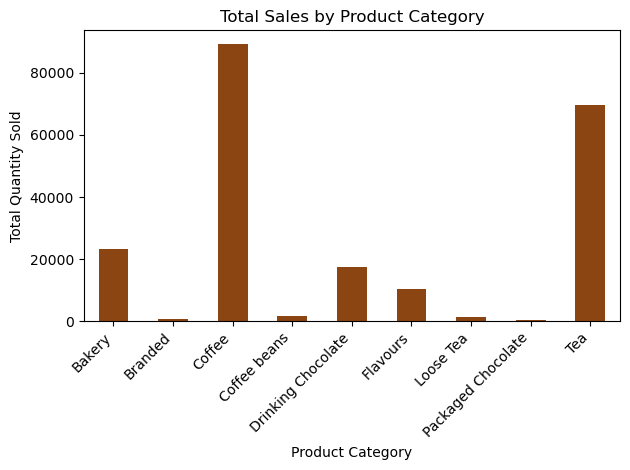

In [92]:
category_sales = data.groupby('product_category')['transaction_qty'].sum()

# Plot the sales by category as a bar plot
category_sales.plot(kind='bar', color='saddlebrown', title='Total Sales by Product Category', ylabel='Total Quantity Sold', xlabel='Product Category')

# Display the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

How do sales vary by time of day?

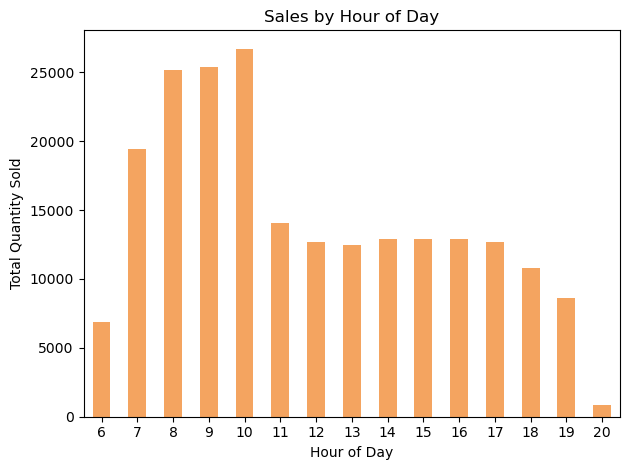

In [106]:
# Extract the hour from 'transaction_time'
data['hour'] = data['transaction_time'].dt.hour

# Group by hour and sum the 'transaction_qty'
hourly_sales = data.groupby('hour')['transaction_qty'].sum()

# Plot the sales by hour as a bar plot
hourly_sales.plot(kind='bar', color='sandybrown', title='Sales by Hour of Day', ylabel='Total Quantity Sold', xlabel='Hour of Day')

# Display the plot
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

2. Product Performance


Which products have the highest and lowest sales?


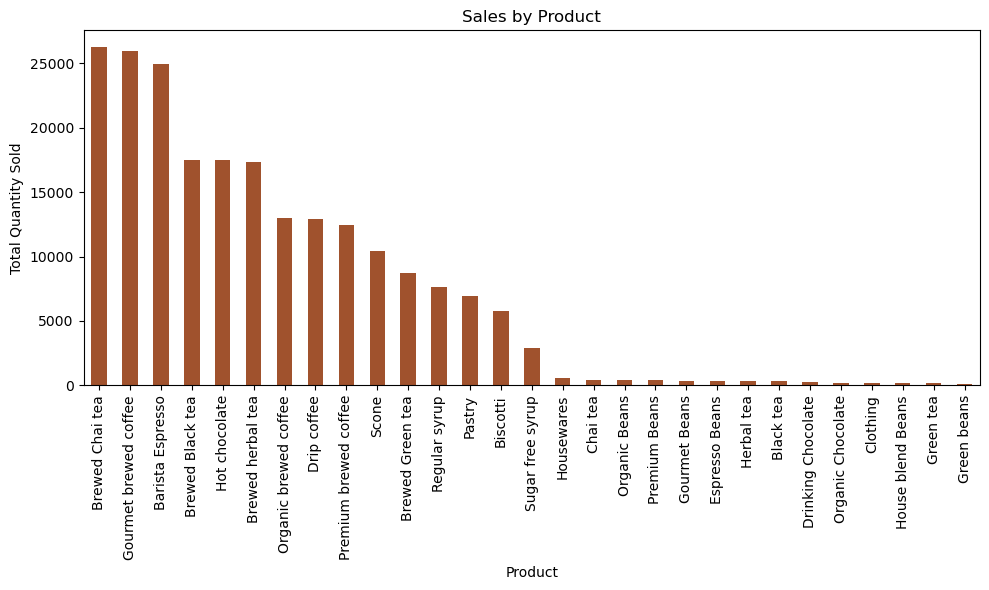

In [132]:
# Group by product_id and sum the transaction_qty to get total sales per product
product_sales = data.groupby('product_type')['transaction_qty'].sum()

# Sort the products by total sales
product_sales = product_sales.sort_values(ascending=False)

# Plot the results
plt.figure(figsize=(10,6))
product_sales.plot(kind='bar', color='sienna', title='Sales by Product', xlabel='Product', ylabel='Total Quantity Sold')

# Display the plot
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Are there certain products that are sold more during specific times of the day?

<Figure size 1200x600 with 0 Axes>

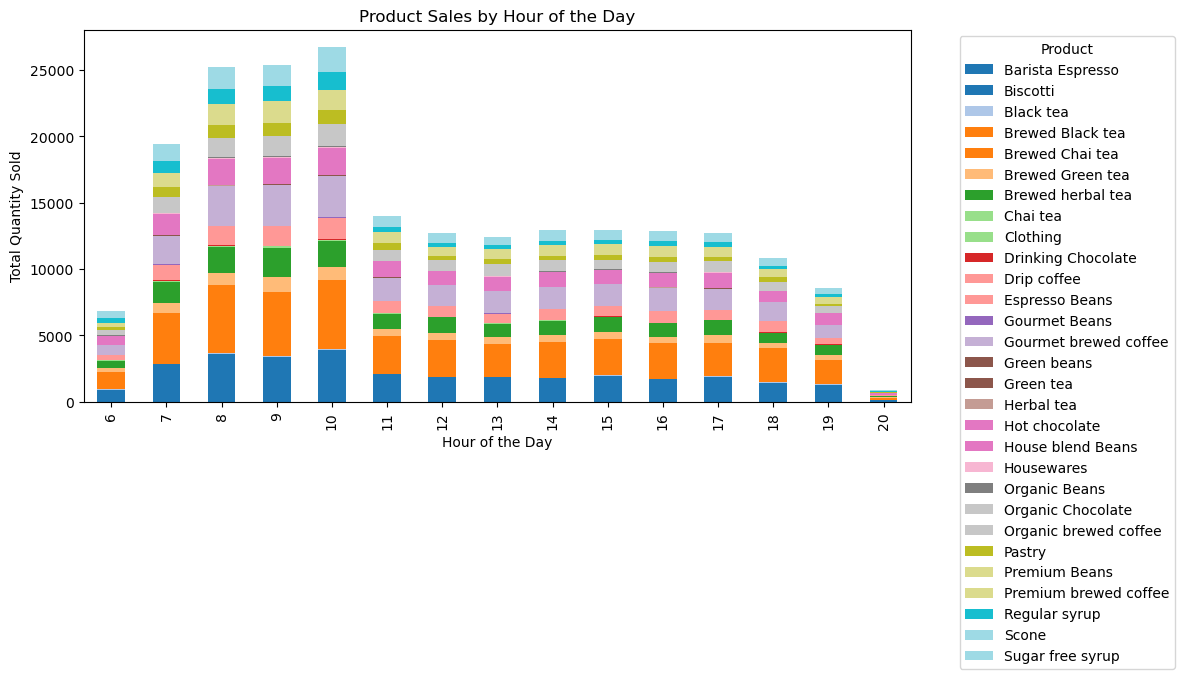

In [166]:
# Extract hour of the day and day of the week
data['hour'] = data['transaction_time'].dt.hour


# Group by hour and product_id and sum the transaction_qty to find sales by hour
sales_by_hour = data.groupby(['hour', 'product_type'])['transaction_qty'].sum().unstack(fill_value=0)

# Plot sales by hour for each product
plt.figure(figsize=(12, 6))
sales_by_hour.plot(kind='bar', stacked=True, figsize=(12, 6), cmap='tab20')
plt.title('Product Sales by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Total Quantity Sold')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

3. Store Performance


How do sales differ across store locations?


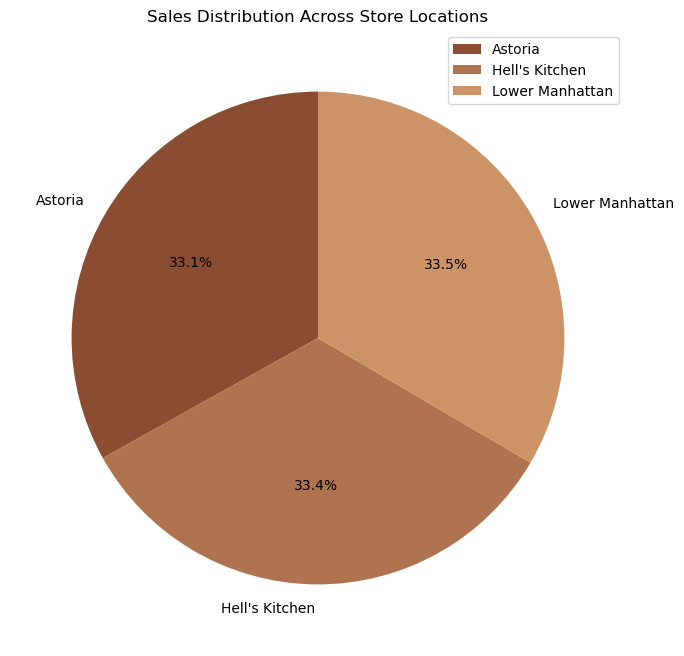

In [179]:
# Group by store_location and sum up transaction_qty to find total sales per location
sales_by_location = data.groupby('store_location')['transaction_qty'].sum()

# Define a custom brown color palette with three shades
brown_shades = ['#8B4D32', '#AF734F', '#CC9466']  # Dark brown, medium brown, light brown

# Plot a pie chart with the custom brown shades
plt.figure(figsize=(8, 8))
sales_by_location.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=brown_shades,legend=True)
plt.title('Sales Distribution Across Store Locations')
plt.ylabel('')  # Remove the ylabel for a cleaner plot
plt.show()

Is there a relationship between store location and product categories sold?


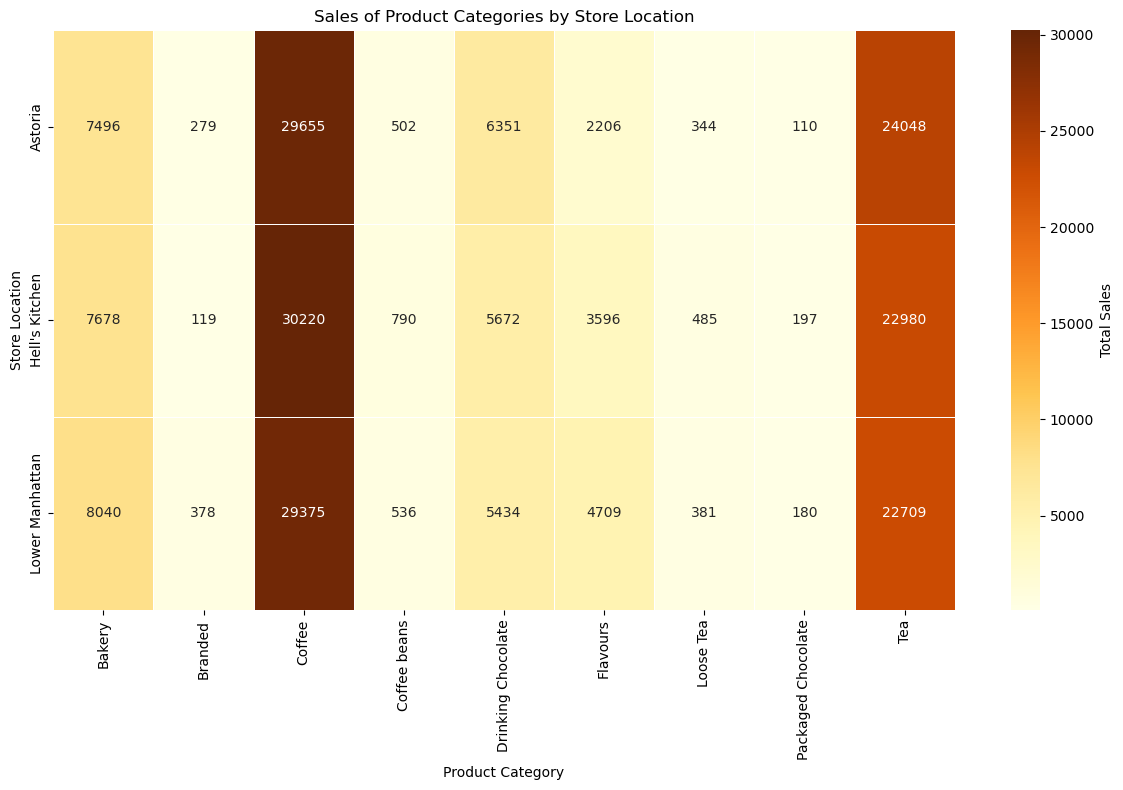

In [182]:
# Group by store_location and product_category, then sum transaction_qty
sales_by_location_category = data.groupby(['store_location', 'product_category'])['transaction_qty'].sum().unstack(fill_value=0)

# Plot a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(sales_by_location_category, annot=True, cmap='YlOrBr', fmt='g', cbar_kws={'label': 'Total Sales'}, linewidths=0.5)
plt.title('Sales of Product Categories by Store Location')
plt.xlabel('Product Category')
plt.ylabel('Store Location')
plt.tight_layout()
plt.show()

4. Sales and Pricing Analysis


How does the unit price affect the number of transactions?


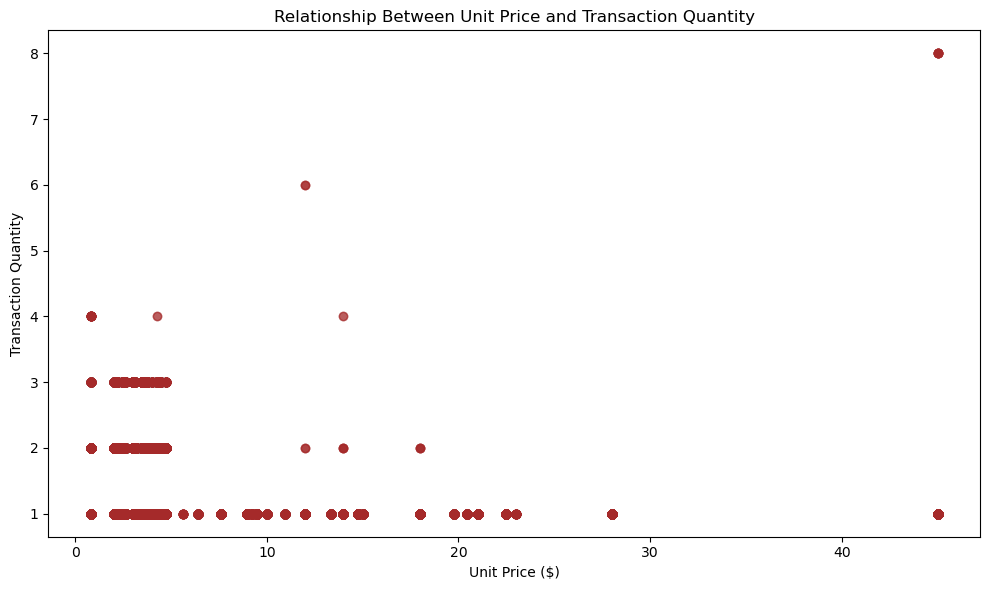

In [193]:
# Plot the relationship between unit_price and transaction_qty using a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['unit_price'], data['transaction_qty'], alpha=0.5, color='brown')
plt.title('Relationship Between Unit Price and Transaction Quantity')
plt.xlabel('Unit Price ($)')
plt.ylabel('Transaction Quantity')
plt.tight_layout()
plt.show()

Which products generate the most revenue?

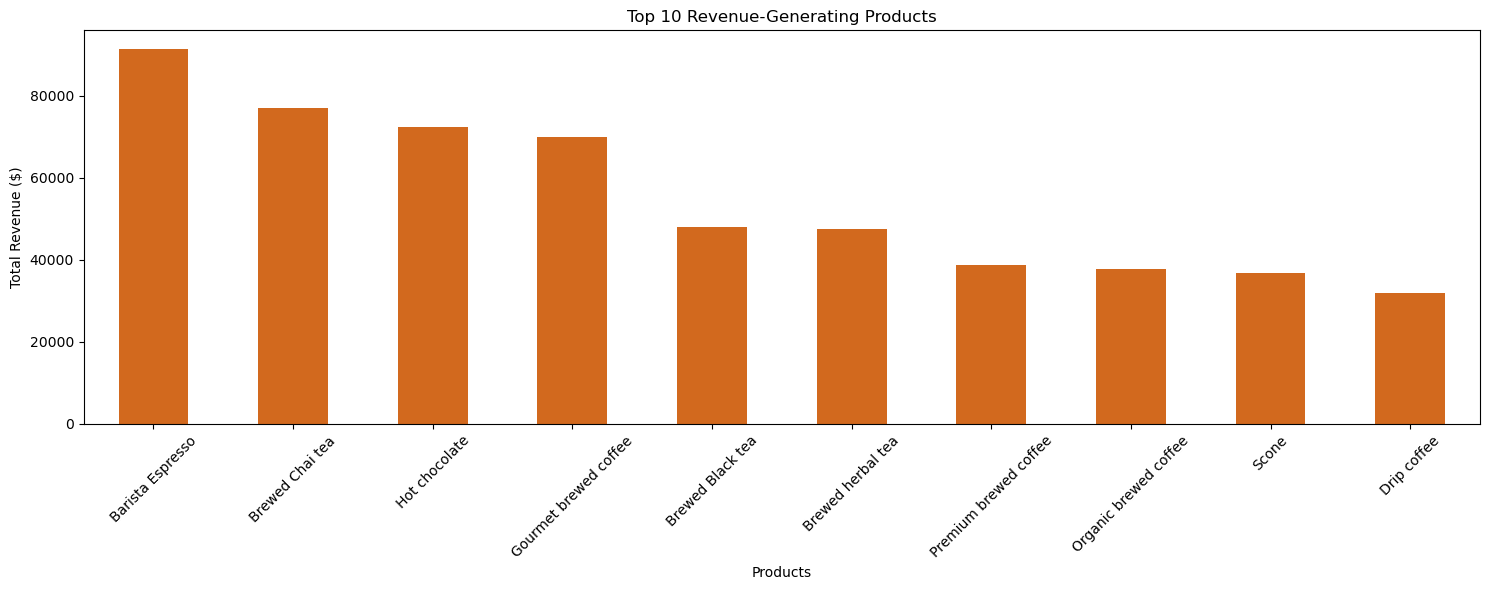

In [232]:
# Calculate total revenue for each transaction
data['revenue'] = data['transaction_qty'] * data['unit_price']

# Group by product_type and sum up the revenue
revenue_by_type = data.groupby('product_type')['revenue'].sum()

# Sort the values to get the top 10 product types with the highest revenue
top_5_revenue = revenue_by_type.sort_values(ascending=False).head(10)

# Create a bar plot to display the top 10 product types by revenue
plt.figure(figsize=(15, 6))
top_5_revenue.plot(kind='bar', color='chocolate')
plt.title('Top 10 Revenue-Generating Products')
plt.xlabel('Products')
plt.ylabel('Total Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Conclusion


1. Coffee, Tea and Bakery are the three most sold categories of products.
2. Most Products are sold between 7:00am and 10:00am with peak time at 10:00 am.
3. The most and least sold products are Brewed Chai Tea and Green Beans.
4. Store at Lower Manhattan has the most sales.
5. Coffee, Coffee beans, Packeged Chocolate and Loose Tea sales are the most for Hell's Kitchen store.
6. Tea and Drinking Chocolate sales are highest for Astoria store.
7. Flavours, Branded and Bakery sales are highest for Lower Manhattan store.
8. Products sold at unit price between 0 to 5 dollars have high sales in terms of transaction quantity.
9. Barista Espresso, Brewed Chai Tea, Hot Chocolate, Gourmet brewed coffee, Brewed Black tea, Brewed herbal tea, Premium brewed coffee, Organic brewed coffee, Scone, Drip Coffee are the top 10 most revenue-generating products.